In [ ]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set(style="darkgrid")
from time import time

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
# Import the three supervised learning models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA    

# Pretty display for notebooks
%matplotlib inline
from random import shuffle

In [ ]:
# without accuracy
import time
# import pulp as p 
# from random import *

# Add column names to data set
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 
           'relationship', 'race','sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

# Read in train data
adult_train = pd.read_csv('data/adult_actual/adult_train_data.csv', header=None, names=columns, skipinitialspace=True)

# Drop the fnlwgt column which is useless for later analysis
adult_train = adult_train.drop('fnlwgt', axis=1)

# Read in test data
adult_test = pd.read_csv('data/adult_actual/adult_test_data.csv', header=None, skiprows=1, names=columns, skipinitialspace=True)

# Drop the fnlwgt column which is useless for later analysis
adult_test = adult_test.drop('fnlwgt', axis=1)

# Remove '.' in income column
adult_test['income'] = adult_test['income'].apply(lambda x: '>50k' if x=='>50k.'  else '<=50k')


# Convert '?' to NaNs and remove the entries with NaN value
# Check missing value code and convert to NaNs
object_col = adult_train.select_dtypes(include=object).columns.tolist()
for col in object_col:
    adult_train.loc[adult_train[col]=='?', col] = np.nan
    adult_test.loc[adult_test[col]=='?', col] = np.nan

# Perform an mssing assessment in each column of the dataset.
col_missing_pct = adult_train.isna().sum()/adult_train.shape[0]
col_missing_pct.sort_values(ascending=False)

# Remove data entries with missing value
adult_train = adult_train.dropna(axis=0, how='any')
adult_test = adult_test.dropna(axis=0, how='any')

# Show the results of the split
# print("After removing the missing value:")
# print("Training set has {} samples.".format(adult_train.shape[0]))
# print("Testing set has {} samples.".format(adult_test.shape[0]))
for col in object_col:
    print(adult_train[col].value_counts(dropna=False)/adult_train.shape[0],'\n')
# print(adult_train.head())
# print(adult_test.head())    

adult_train.reset_index(drop=True, inplace=True)
adult_test.reset_index(drop=True, inplace=True)
p=adult_train.shape[0]
q=adult_test.shape[0]
# reducing dimensionality of some very sparse features
for i in range(0,p):
    if adult_train.loc[i,'native-country'] not in ["united-states"] :
               adult_train.loc[i,"native-country"] = "non-united-stated"        
    if adult_train.loc[i,"education"] in ["Preschool", "1st-4th", "5th-6th", "7th-8th"]:
               adult_train.loc[i,"education"] = "prim-middle-school"
    elif adult_train.loc[i,"education"] in ["9th", "10th", "11th", "12th"]:
               adult_train.loc[i,"education"] = "high-school"   
    if adult_train.loc[i,'income'] in [">50k"] :
               adult_train.loc[i,"income"] = 1 
    else: 
               adult_train.loc[i,"income"] = 0         
#reducing dimensionality of some very sparse features
for i in range(0,q):                
    if adult_test.loc[i,'native-country'] not in ["united-states"]:
               adult_test.loc[i,'native-country'] = "non-united-stated"
    if adult_test.loc[i,'education'] in ["Preschool", "1st-4th", "5th-6th", "7th-8th"]:
               adult_test.loc[i,'education'] = "prim-middle-school"
    elif adult_test.loc[i,'education'] in ["9th", "10th", "11th", "12th"]:
               adult_test.loc[i,'education'] = "high-school"   
    if adult_test.loc[i,'income'] in [">50k",">50k."] :
               adult_test.loc[i,"income"] = 1 
    else: 
               adult_test.loc[i,"income"] = 0            
# print(adult_train.head())
# print(adult_test.head())
DATA=pd.concat([adult_train,adult_test],ignore_index=True)
# print(DATA.tail())
m=DATA.shape[1]

dat=DATA.iloc[:,0:m-1]


# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
num_col = dat.dtypes[dat.dtypes != 'object'].index
features_log_minmax_transform = pd.DataFrame(data = dat)
features_log_minmax_transform[num_col] = scaler.fit_transform(features_log_minmax_transform[num_col])

display(features_log_minmax_transform.head())

# sens=DATA[['sex','race']]

Data_c = pd.get_dummies(features_log_minmax_transform, columns=['sex','race','workclass','education','marital-status','occupation','relationship','native-country'], prefix =['s','r','work','edu','ms','occ','rls','nc'])
r=DATA.iloc[:,m-1]
print(Data_c)
print(DATA['income'].value_counts())


DATA=pd.concat([adult_train,adult_test],ignore_index=True)
# print(DATA.tail())
m=DATA.shape[1]

dat=DATA.iloc[:,0:m-1]


# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
num_col = dat.dtypes[dat.dtypes != 'object'].index
features_log_minmax_transform = pd.DataFrame(data = dat)
features_log_minmax_transform[num_col] = scaler.fit_transform(features_log_minmax_transform[num_col])

display(features_log_minmax_transform.head())

# sens=DATA[['sex','race']]

Data_c = pd.get_dummies(features_log_minmax_transform, columns=['sex','race','workclass','education','marital-status','occupation','relationship','native-country'], prefix =['s','r','work','edu','ms','occ','rls','nc'])
r=DATA.iloc[:,m-1]
print(Data_c)
print(DATA['income'].value_counts())
#marital
#U=80, M=24928, S=11568, D=4612
# m_3, m_0, m_1, m_2
#age
#>60 and <25= a_1
#>=25and <=60 =a_2
# print(data.head())
# print(data.shape[0],data.shape[1])

#sensitive columns name 0='age',2='marital'


#X_test,Y_test_pred,Y_test,e = adult_svm(Data_c , r)




#marital
#U=80, M=24928, S=11568, D=4612
# m_3, m_0, m_1, m_2
#age
#>60 and <25= a_1
#>=25and <=60 =a_2
# print(data.head())
# print(data.shape[0],data.shape[1])

#sensitive columns name 0='age',2='marital'


#X_test,Y_test_pred,Y_test,e = adult_svm(Data_c , r)

#X_test.reset_index(drop=True, inplace=True)
# Y_test_pred.reset_index()
#Y_test.reset_index(drop=True, inplace=True)

# print(X_test)
# print(Y_test_pred)
# print(Y_test)
#sens=X_test[['s_male', 's_female'  ,'r_white', 'r_black', 'r_asian-pac-islander','r_amer-indian-eskimo','r_other']]
#sensitive = sens.T
#accu_all,DP_all,acceptance_rate,alpha_weight = main(sensitive, Y_test, Y_test_pred,e)


# 

private             0.738877
self-emp-not-inc    0.082853
local-gov           0.068530
state-gov           0.042404
self-emp-inc        0.035608
federal-gov         0.031265
without-pay         0.000464
Name: workclass, dtype: float64 

hs-grad         0.326238
some-college    0.221404
bachelors       0.167230
masters         0.053942
assoc-voc       0.043333
11th            0.034746
assoc-acdm      0.033420
10th            0.027187
7th-8th         0.018467
prof-school     0.017970
9th             0.015085
12th            0.012499
doctorate       0.012433
5th-6th         0.009548
1st-4th         0.005006
preschool       0.001492
Name: education, dtype: float64 

married-civ-spouse       0.466315
never-married            0.322459
divorced                 0.139712
separated                0.031132
widowed                  0.027419
married-spouse-absent    0.012267
married-af-spouse        0.000696
Name: marital-status, dtype: float64 

prof-specialty       0.133877
craft-repair         0

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,state-gov,bachelors,0.800000,never-married,adm-clerical,not-in-family,white,male,0.02174,0.0,0.397959,united-states
1,0.452055,self-emp-not-inc,bachelors,0.800000,married-civ-spouse,exec-managerial,husband,white,male,0.00000,0.0,0.122449,united-states
2,0.287671,private,hs-grad,0.533333,divorced,handlers-cleaners,not-in-family,white,male,0.00000,0.0,0.397959,united-states
3,0.493151,private,high-school,0.400000,married-civ-spouse,handlers-cleaners,husband,black,male,0.00000,0.0,0.397959,united-states
4,0.150685,private,bachelors,0.800000,married-civ-spouse,prof-specialty,wife,black,female,0.00000,0.0,0.397959,non-united-stated


            age  education-num  ...  nc_non-united-stated  nc_united-states
0      0.301370       0.800000  ...                     0                 1
1      0.452055       0.800000  ...                     0                 1
2      0.287671       0.533333  ...                     0                 1
3      0.493151       0.400000  ...                     0                 1
4      0.150685       0.800000  ...                     1                 0
...         ...            ...  ...                   ...               ...
45216  0.219178       0.800000  ...                     0                 1
45217  0.301370       0.800000  ...                     0                 1
45218  0.287671       0.800000  ...                     0                 1
45219  0.369863       0.800000  ...                     0                 1
45220  0.246575       0.800000  ...                     0                 1

[45221 rows x 59 columns]
0    34013
1    11208
Name: income, dtype: int64


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,state-gov,bachelors,0.800000,never-married,adm-clerical,not-in-family,white,male,0.02174,0.0,0.397959,united-states
1,0.452055,self-emp-not-inc,bachelors,0.800000,married-civ-spouse,exec-managerial,husband,white,male,0.00000,0.0,0.122449,united-states
2,0.287671,private,hs-grad,0.533333,divorced,handlers-cleaners,not-in-family,white,male,0.00000,0.0,0.397959,united-states
3,0.493151,private,high-school,0.400000,married-civ-spouse,handlers-cleaners,husband,black,male,0.00000,0.0,0.397959,united-states
4,0.150685,private,bachelors,0.800000,married-civ-spouse,prof-specialty,wife,black,female,0.00000,0.0,0.397959,non-united-stated


            age  education-num  ...  nc_non-united-stated  nc_united-states
0      0.301370       0.800000  ...                     0                 1
1      0.452055       0.800000  ...                     0                 1
2      0.287671       0.533333  ...                     0                 1
3      0.493151       0.400000  ...                     0                 1
4      0.150685       0.800000  ...                     1                 0
...         ...            ...  ...                   ...               ...
45216  0.219178       0.800000  ...                     0                 1
45217  0.301370       0.800000  ...                     0                 1
45218  0.287671       0.800000  ...                     0                 1
45219  0.369863       0.800000  ...                     0                 1
45220  0.246575       0.800000  ...                     0                 1

[45221 rows x 59 columns]
0    34013
1    11208
Name: income, dtype: int64


In [ ]:
#from aif360.datasets import AdultDataset
from scipy.optimize import minimize
from warnings import warn
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.base import BaseEstimator, MetaEstimatorMixin, clone


#ad = AdultDataset(instance_weights_name='fnlwgt',features_to_drop=[])
#WARNING:root:Missing Data: 3620 rows removed from dataset.
single_protected = ['sex','race']
single_privileged = [['Male'],['White']]
#ceo = CalibratedEqualizedOdds(prot_attr = None)
y_train = adult_train.loc[:,'income']
y_test = adult_test.loc[:,'income']
adult_train_X = adult_train.drop('income', axis=1)
adult_test_X = adult_test.drop('income', axis=1)

print(list(set(y_train.index.names)))
print(y_train.index.names)      
print(len(adult_train.columns))
print(len(adult_train_X.columns))


X_train = adult_train_X
X_test = adult_test_X
X_train, X_test, y_train, y_test = train_test_split(Data_c , r, test_size= 0.3, random_state=0, shuffle=True)
#data_preproc = make_column_transformer((OneHotEncoder(sparse=False, handle_unknown='ignore'),
#                                        X_train.dtypes == 'category'), remainder=StandardScaler())

#X_train = pd.DataFrame(data_preproc.fit_transform(X_train), index=X_train.index)
#X_test = pd.DataFrame(data_preproc.fit_transform(X_test), index=X_test.index)

y_train=y_train.astype('int')
y_test=y_test.astype('int')
print(y_train)
y_train = y_train.rename_axis('race')
print(y_train)
print(X_train)
l = []
for i in range(len(y_train)):
    if(X_train.iloc[i,9]==1):
        l.append(0)
    else:
        l.append(1)

y_train.index = l
y_train = y_train.rename_axis('s_male')
print(y_train)
#print(p not in y_train.index.names for p in 'race')
print(y_train.index.names)    

data_preproc = make_column_transformer(
    (OneHotEncoder(sparse=False, handle_unknown='ignore'), X_train.dtypes == 'category'),
        remainder=StandardScaler())

#X_train = pd.DataFrame(data_preproc.fit_transform(X_train), index=X_train.index)
#X_test = pd.DataFrame(data_preproc.transform(X_test), index=X_test.index)

lr = LogisticRegression()
#pp = CalibratedEqualizedOdds(prot_attr='s_male',cost_constraint='weighted', random_state=1234567)
#lr = LogisticRegression(C=1000.0, random_state=0)
#ceo = PostProcessingMeta(estimator=lr,postprocessor=pp, random_state=1234567)
#ceo.fit(X_train, y_train)
#ceo.prot_attr_= '9'

print(X_test)


#ceo.fit(adult_train_X, y_train)
#z = ceo.predict(adult_test)

#ad_data = AdultDataset(protected_attribute_names=single_protected, privileged_classes=single_privileged, categorical_features=[],features_to_keep=['age', 'education-num'])
#print(ad_data.df.size)
#['education-num', 'age', 'sex'] 
#print(ad.label_names)
#x,y = adv._classifier_model(ad_data.features_names, 3, 0.4)
#op = OptimPreproc(rosen, {'disp': True}, unprivileged_groups=[{'sex':'Female'}], privileged_groups=[{'sex':'Male'}])
#ad_data_new = op.fit_transform(ad_data)
#['income-per-year']

#origin_adult = BinaryLabelDataset(df = adult_test, label_names = 'income',
#                                protected_attribute_names = ['sex', 'race'], 
#                                privileged_protected_attributes = ['Male','White'],
#                                instance_weights_name=None,
                               # categorical_features=['workclass', 'education','marital-status', 'occupation', 'relationship','native-country'],  
                               # features_to_drop=['fnlwgt'],custom_preprocessing=None,
#                                favorable_label='1', unfavorable_label='0')


#svm_adult = BinaryLabelDataset()

#ad2 = eo.fit(ad_data,ad_data_new)







[None]
[None]
14
13
10300    0
39301    1
2666     0
17989    0
11495    0
        ..
30403    0
21243    1
42613    1
43567    1
2732     0
Name: income, Length: 31654, dtype: int64
race
10300    0
39301    1
2666     0
17989    0
11495    0
        ..
30403    0
21243    1
42613    1
43567    1
2732     0
Name: income, Length: 31654, dtype: int64
            age  education-num  ...  nc_non-united-stated  nc_united-states
10300  0.013699       0.400000  ...                     0                 1
39301  0.328767       0.800000  ...                     0                 1
2666   0.342466       0.600000  ...                     0                 1
17989  0.041096       0.533333  ...                     0                 1
11495  0.315068       0.600000  ...                     0                 1
...         ...            ...  ...                   ...               ...
30403  0.123288       0.800000  ...                     0                 1
21243  0.301370       0.666667  ...      

In [ ]:
 pip install pulp

     |████████████████████████████████| 14.2 MB 23.1 MB/s 


In [ ]:
from sklearn.model_selection import cross_val_score  
from sklearn.svm import SVC
rf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=64, random_state=0)
#svm = SVC(kernel='rbf', random_state=0, gamma=.1, C=10.0,probability=True)
rf.fit(X_train, y_train)
print('The accuracy of the Random_Forest classifier on training data is {:.2f}'.format(rf.score(X_train, y_train)))
print('The accuracy of the Random_Forest classifier on test data is {:.2f}'.format(rf.score(X_test, y_test)))
print('####Train prediction Label###############################################')
y_train_pred=rf.predict(X_train)
#print(y_1)
y_test_pred=rf.predict(X_test)
e=rf.predict_proba(X_test)
print(e)
print(y_test_pred)


The accuracy of the Random_Forest classifier on training data is 0.88
The accuracy of the Random_Forest classifier on test data is 0.87
####Train prediction Label###############################################
[[0.69829171 0.30170829]
 [0.96621278 0.03378722]
 [0.85440665 0.14559335]
 ...
 [0.82390484 0.17609516]
 [0.99506751 0.00493249]
 [1.         0.        ]]
[0 0 0 ... 0 0 0]


In [ ]:
sens=X_test[['s_male', 's_female'  ,'r_white', 'r_black', 'r_asian-pac-islander','r_amer-indian-eskimo','r_other']]
sens_train_race= X_train[['r_white', 'r_black', 'r_asian-pac-islander','r_amer-indian-eskimo','r_other']]
sens_train = X_train[['s_male', 's_female'  ,'r_white', 'r_black', 'r_asian-pac-islander','r_amer-indian-eskimo','r_other']]
sens_train_sex = X_train[['s_male', 's_female']]

sens_test_race = X_test[['r_white', 'r_black', 'r_asian-pac-islander','r_amer-indian-eskimo','r_other']]
sens_test_sex = X_test[['s_male', 's_female']]

print(sens)
sensitive = sens.T
#print(sensitive_final)

       s_male  s_female  ...  r_amer-indian-eskimo  r_other
41386       0         1  ...                     0        0
35278       0         1  ...                     0        0
26950       1         0  ...                     0        0
29133       0         1  ...                     0        0
41793       1         0  ...                     0        0
...       ...       ...  ...                   ...      ...
26337       1         0  ...                     0        0
12251       0         1  ...                     0        0
1411        1         0  ...                     0        0
10478       0         1  ...                     0        0
38459       0         1  ...                     0        0

[13567 rows x 7 columns]


In [ ]:
from random import *
beta_natural=[0.2576267506242536, 0.07575757575757576, 0.2111662955985614, 0.08934426229508197, 0.2698019801980198, 0.1, 0.034782608695652174]

def find_eo_stats_multiple(y,y_pred):    
    m = 7
    sens_stats = np.zeros((4,m), dtype = int)
    sens_acc = np.zeros(m, dtype = float)
    sizes = np.zeros(m, dtype = int)
    #first row positives, second row negatives, third row true positive, fourth row false positive
    
    
    for i in range(m):
        for j in range(len(y)):
            if(sensitive.iloc[i,j] == 1):
                sizes[i] = sizes[i]+1
                if(y_pred[j]==1):
                    sens_acc[i] = sens_acc[i] + 1
                if(y.iloc[j]==1):
                    sens_stats[0][i] =sens_stats[0][i] + 1
                if(y.iloc[j]==1 and y_pred[j]==1):
                    sens_stats[2][i] =sens_stats[2][i] + 1
                if(y.iloc[j]==0):
                    sens_stats[1][i] =sens_stats[1][i] + 1
                if(y.iloc[j]==0 and y_pred[j]==1):
                    sens_stats[3][i] =sens_stats[3][i] + 1    
        sens_acc[i] = sens_acc[i]/sizes[i]
        #print(sens_acc[i],sizes[i])
        
    
    TPR = np.zeros(m,dtype=float)
    FPR = np.zeros(m,dtype=float)
    precision = np.zeros(m,dtype=float)
    
    accu = 0
    n = len(y)
    #flip(y_pred)
    for i in range(n):
        if(y.iloc[i] == y_pred[i]):
            accu = accu+1
    
    accu = accu/n
    
    max_tpr = -1 
    min_tpr = 2
    max_fpr = -1
    min_fpr = 2
    
    for i in range(m):
        TPR[i] = sens_stats[2][i]/sens_stats[0][i]
        FPR[i] = sens_stats[3][i]/sens_stats[1][i]
        if(TPR[i] >= max_tpr):
            max_tpr = TPR[i]
        if(TPR[i] <= min_tpr):
            min_tpr = TPR[i]
        if(FPR[i] >= max_fpr):
            max_fpr = FPR[i]
        if(FPR[i] <= min_fpr):
            min_fpr = FPR[i]
    
    for i in  range(m):
        print("TPR / Recall of the ",i,"th sensitive groups is",TPR[i])
        
    print("=====================")    
    for i in  range(m):
        print("FPR of the ",i,"th sensitive groups is",FPR[i])
    
    print("=====================")
    for i in  range(m):    
        print("Acceptance Rate of the ",i,"th sensitive groups is",sens_acc[i])
    for i in range(m):
        precision[i]=sens_stats[2][i]/(sens_acc[i]*sizes[i])
        print("Precision of the ",i,"th sensitive groups is",precision[i])
    DEO = abs(max_tpr-min_tpr) + abs(max_fpr-min_fpr)
    

       
    weight_p=0
    weight_r=0
    weight_prec=0
    weight_rec=0


    weight_p_ng=0
    weight_r_ng=0
    weight_prec_ng=0
    weight_rec_ng=0

    for j in range(m):    
        weight_prec=weight_prec+sizes[j]*precision[j]
        weight_p=weight_p+sizes[j]
        weight_rec=weight_rec+sizes[j]*TPR[j]
        weight_r=weight_r+sizes[j] 


   # for j in range(m):    
   #   if sens_acc[j] <= beta_natural[j]:
   #     weight_prec_ng=weight_prec_ng +sizes[j]*precision[j]
   #     weight_p_ng =weight_p_ng +sizes[j]
   #   else:  
   #     weight_rec_ng =weight_rec_ng +sizes[j]*TPR[j]
   #     weight_r_ng =weight_r_ng +sizes[j] 


    wp=weight_prec/weight_p
    wr=weight_rec/weight_r           
    print("weighted prec,weighted rec", wp,wr)
    print("The TPR differnce is ", abs(max_tpr-min_tpr),"The FPR difference is ", abs(max_fpr-min_fpr))   
    print("The Difference of Equalized odds of the classifier is=",DEO)
    print("Accuracy of the classifier",accu)
         
   
    
#find_eo_stats_multiple(y_test,y_pred_CEO)
#find_eo_stats_multiple(y_test,y_test_pred)



        

In [ ]:
pip install pulp

In [ ]:
# bilal - am_ind asian black other white female male(actual precision sequence)
# 6         5          4          2                1              0                  3

# ours -s_male, s_female  r_white, r_black, r_asian-pac-islander','r_amer-indian-eskimo','r_other
           
# beta=[6         5          4          2                1              0                  3]

# beta=[beta[6], beta[5],beta[4],beta[2],beta[1],beta[0],beta[3]]


#bilal -female male  am_ind asian  black other white (actual acceptance rate sequence)
#          0      1     2       3     4      5    6   
# ours -s_male, s_female  r_white, r_black, r_asian-pac-islander','r_amer-indian-eskimo', 'r_other
           
# beta=[1       0        6          4            3                   2                    5]


#NG
import time
#import gurobipy as gp
#from gurobipy import GRB
import pulp as p 
def lp_equalized_odds(data1,eps,y_test_pred,e,beta_avg,alpha):
    import pulp as p 
    import math
    
    
    m=data1.shape[0]
    n=data1.shape[1]
    print('dimension of data')
    print(m,n)
    
        
    ############### #  SORTED for ACCURACY ONLY ####
    m=7
    h1=[]
    key1=[]
    cost=np.zeros(n,dtype=int)
    data2=np.zeros((m,n),dtype=int)
    
    for i in range(n):
            h1.append(e[i][1])
            key1.append(i)

        
#print(hc)
#     print(key1)
    
    for i in range(1,len(h1)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h1[j-1]<h1[j]:
                index=j
                var=h1[j]
                h1[j]=h1[j-1]
                h1[j-1]=var

                var2=key1[j]
                key1[j]=key1[j-1]
                key1[j-1]=var2
            else:
                break
    

    
    
    for j in range(len(key1)):    
         data2[0][key1[j]]=j+1
    
    for j in range(n):
        summ=0
        summ=summ+data2[0][j] 
        cost[j]=summ

    Lp_prob = p.LpProblem('Problem', p.LpMinimize)  
    solver = p.getSolver('PULP_CBC_CMD', timeLimit=20)
   
    
#     X=np.zeros(n+1,dtype=p.LpVariable)
    X=np.zeros(n+m+1,dtype=p.LpVariable)
    Y=np.zeros(m,dtype=p.LpVariable)
    
    sizes=np.zeros(m,dtype=int)
#     report_index(index,data1,e):  
    max_size=0
    for i in range(m):
        count=0
        for j in range(n):
            if data1[i][j]==1:
                count=count+1 
        if count>max_size:
            max_size=count
        sizes[i]=count
    print(sizes)    
    #############################33
    
    
    
    beta_actual = np.zeros(m,dtype=float)
    ###############################
    for i in range(m):
      beta_actual[i] = eps




    
    
    select_sizes=np.zeros(m,dtype=int)
   
    size_final=np.zeros(m,dtype=int)

    for i in range(m):
        var1 = str(n+100+i)
        Y[i]=p.LpVariable(var1,lowBound=0,upBound=1,cat='Continuous')
    
    for i in range(n):
        var1=str(i)       
        X[i]=p.LpVariable(var1,lowBound=0,upBound=1,cat='Integer')
   
    X[n]=p.LpVariable(str(n),lowBound=0,upBound=1,cat='Continuous')  

    tpr = p.LpVariable(str(n+200),lowBound=0,upBound=1,cat='Continuous')  
    fpr = p.LpVariable(str(n+201),lowBound=0,upBound=1,cat='Continuous')  

#     for i in range(m):
#         k=n+i+1
#         var1=str(k)     
#         alpha=(((sizes[i])*(sizes[i]+1))/2)
#         X[i]=p.LpVariable(var1,lowBound=(((beta*sizes[i])*(beta*sizes[i]+1))/2),upBound=alpha,cat='Continuous')
    
        
#     X[n]=  p.LpVariable("z1",lowBound=0)
    #X[n+1]=  p.LpVariable("z2",lowBound=0)
  

    #########objective function#####################
    
#     Lp_prob += 2*X[n+1]+10*X[n+2]+9*X[n+3]+3*X[n+4]
    #alpha=0.8
    #beta_avg = 0.10
    Lp_prob+= p.lpSum([(X[j])*cost[j] for j in range(n)]) 
    #Lp_prob+=1  
    
    #Lp_prob += Y[0]*sizes[0] + Y[1]*sizes[1] >= p.lpSum([Y[j]*sizes[j] for j in np.arange(2,6)])
    #Lp_prob += Y[0]*sizes[0] + Y[1]*sizes[1] <= p.lpSum([Y[j]*sizes[j] for j in np.arange(2,6)])
    
    ##############constraint#################
    #first select the  the number of make female in test data
    #then apply the equalized odd constraints assuming 
    #look at all males which have been predicted positve/and all the females predicted negative
    F_test = 0
    M_test = 0
        
    #for i in range(len(y_test)):
    #    if(data1[0][i]==1 and y_test.iloc[i]==1):
    #        M_test= M_test+1
    #    elif(data1[1][i]==1 and y_test.iloc[i]==1):
    #        F_test= F_test+1
    test_count = np.zeros(m, dtype = int)

    for i in range(len(y_test)):
      for j in range(m): 
        if(data1[j][i]==1 and y_test_pred[i]==1):
            test_count[j] = test_count[j] +1
                
    
    #Lp_prob += (p.lpSum([(X[j])*(data1[0][j])*y_test_pred[j] for j in range(n) if y_test_pred[j]==1])/M_test) <= (p.lpSum([(X[j])*(data1[1][j])*y_test_pred[j] for j in range(n) if y_test_pred[j]==1])/F_test) + 0.0009
    #Lp_prob += (p.lpSum([(X[j])*(data1[0][j])*(1-y_test_pred[j]) for j in range(n) if y_test_pred[j]==0])/(sizes[0]-M_test)) <= (p.lpSum([(X[j])*(data1[1][j])*(1-y_test_pred[j]) for j in range(n) if y_test_pred[j]==0])/(sizes[1]-F_test))+ 0.0009
    for i in range(m):   #TPR constraints
      Lp_prob += (1/test_count[i])*p.lpSum([(X[j])*(data1[i][j])*y_test_pred[j] for j in range(n) if (y_test_pred[j]==1) ]) >= tpr 
      Lp_prob += (1/test_count[i])*p.lpSum([(X[j])*(data1[i][j])*y_test_pred[j] for j in range(n) if (y_test_pred[j]==1 )]) <= tpr + 0.4
    for i in range(m):    #FPR constraints
      Lp_prob += (1/(sizes[i]-test_count[i]))*p.lpSum([(X[j])*(data1[i][j])*(1-y_test_pred[j]) for j in range(n) if (y_test_pred[j]==0)]) >= fpr
      Lp_prob += (1/(sizes[i]-test_count[i]))*p.lpSum([(X[j])*(data1[i][j])*(1-y_test_pred[j]) for j in range(n) if (y_test_pred[j]==0)]) <= fpr + 0.2

    #Lp_prob += F_test*p.lpSum([(X[j])*(data1[0][j])*y_test_pred[j] for j in range(n) if (y_test_pred[j]==1) ]) <= M_test*p.lpSum([(X[j])*(data1[1][j])*y_test_pred[j] for j in range(n) if (y_test_pred[j]==1 )]) + 0.004
    #Lp_prob += (sizes[1]-F_test)*p.lpSum([(X[j])*(data1[0][j])*(1-y_test_pred[j]) for j in range(n) if (y_test_pred[j]==0)]) <= (sizes[0]-M_test)*p.lpSum([(X[j])*(data1[1][j])*(1-y_test_pred[j]) for j in range(n) if (y_test_pred[j]==0 )]) + 0.004
    


    #Lp_prob += F_test*p.lpSum([(X[j])*(data1[0][j])*y_test_pred[j] for j in range(n) if (y_test_pred[j]==1 and y_test.iloc[j]==1) ]) <= M_test*p.lpSum([(X[j])*(data1[1][j])*y_test_pred[j] for j in range(n) if (y_test_pred[j]==1 and y_test.iloc[j]==1)]) + 0.01
    #Lp_prob += (sizes[1]-F_test)*p.lpSum([(X[j])*(data1[0][j])*(1-y_test_pred[j]) for j in range(n) if (y_test_pred[j]==0 and y_test.iloc[j]==0)]) <= (sizes[0]-M_test)*p.lpSum([(X[j])*(data1[1][j])*(1-y_test_pred[j]) for j in range(n) if (y_test_pred[j]==0 and y_test.iloc[j]==0)]) + 0.01
    
    #Lp_prob += p.lpSum([(X[j])*(data1[0][j])*y_test.iloc[j] for j in range(n) if y_test.iloc[j]==1])/M_test <= p.lpSum([(X[j])*(data1[1][j])*y_test.iloc[j] for j in range(n) if y_test.iloc[j]==1])/F_test + 0.004
    #Lp_prob += (sizes[1]-F_test)*p.lpSum([(X[j])*(data1[0][j])*(1-y_test.iloc[j]) for j in range(n) if y_test.iloc[j]==0])/M_test <= (sizes[0]-M_test)*p.lpSum([(X[j])*(data1[1][j])*(1-y_test.iloc[j]) for j in range(n) if y_test.iloc[j]==0])/F_test + 0.004
    
    for i in range(m):
      #  if i<m:
            Lp_prob += p.lpSum([(X[j])*(data1[i][j]) for j in range(n)]) >= Y[i]*sizes[i]
            Lp_prob += p.lpSum([(X[j])*(data1[i][j]) for j in range(n)]) <= (Y[i]+0.5)*sizes[i]
    
    for i in range(m):
        if beta_actual[i] >= beta_avg:
            Lp_prob += Y[i] >= (1-alpha)*beta_actual[i] + alpha*beta_avg
            Lp_prob += Y[i] <= beta_actual[i]
        else:
            Lp_prob += Y[i] >= (1-alpha)*beta_actual[i] + alpha*beta_avg
            Lp_prob += Y[i] <= beta_avg 
    
           
    #Lp_prob+= p.lpSum([(X[j])*cost[j] for j in range(n)])>=100
        
    #####################################
    #solver = p.CPLEX_PY()
    #solver.buildSolverModel(Lp_prob)
    #Lp_prob.solverModel.parameters.timelimit.set(60)
    #solver.callSolver(P)
    #status = solver.findSolutionValues(Lp_prob)
    #################################################################
    status = Lp_prob.solve(solver)   # Solver 
    print(p.LpStatus[status]) 
    print("objective is:")        
    print(p.value(Lp_prob.objective))
    print("discripency is:") 
    print(p.value(X[n]))
    x=np.zeros(n,dtype=float)

   # The solution status 
    Synth1={}
    Synth2={}
    # # Printing the final solution 
    for i in range(n):
        if(p.value(X[i])==1):
            Synth1[i]=1 
            Synth2[i]=-1
#             if(data1[2][i]==1):
#                 print("no")
        else:
            Synth1[i]=-1
            Synth2[i]=1
    Synthu1=Synth1  
    Synthu2=Synth2  
    
              
    return Synthu1,Synthu2   


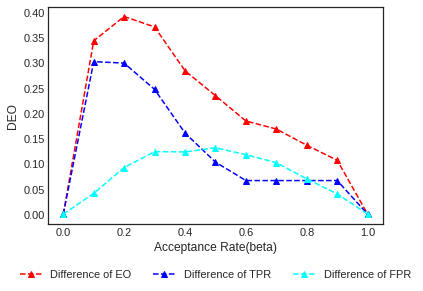

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
from scipy.signal import savgol_filter
np.set_printoptions(precision=4)
plt.style.use('seaborn-white')
fig = plt.figure()
ax = plt.subplot(111)


eo =[0, 0.3437171786154355, 0.3918670501289364, 0.37119836083203195, 0.28430445597242165, 0.23488257013436864, 0.18473485176524929, 0.16879829469757524, 0.13665309892901478, 0.10684785504929384, 0] 
tpr =[0, 0.30244671875573165, 0.2994505494505495, 0.24725274725274726, 0.16086691086691085, 0.10317460317460314, 0.06666666666666665, 0.06666666666666665, 0.06666666666666665, 0.06666666666666665, 0] 
fpr =[0, 0.041270459859703824, 0.09241650067838689, 0.12394561357928466, 0.1234375451055108, 0.1317079669597655, 0.11806818509858263, 0.10213162803090858, 0.06998643226234813, 0.040181188382627187, 0]
beta = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

ax.plot(beta,eo,label='Difference of EO',color='red',marker='^',linestyle='--') 
ax.plot(beta,tpr,label='Difference of TPR',color='blue',marker='^',linestyle='--')  
ax.plot(beta,fpr,label='Difference of FPR',color='cyan',marker='^',linestyle='--') 

plt.title('')
ax.set_xlabel('Acceptance Rate(beta)')
ax.set_ylabel('DEO') 
# ax.set_ylabel('% in +ve class (Acceptance Rate)') 

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
plt.show() 
fig.savefig('a2.png') 


In [ ]:
pip install pulp

     |████████████████████████████████| 41.2 MB 76 kB/s 


In [ ]:
#without accuracy ---> 2
def main2(datax, y_test, y_test_pred,e): 
      
    n=datax.shape[1]
    s=datax.shape[0]    
    data = np.zeros((s, n), dtype = int)
    
    r = np.zeros(n, dtype = int) 
    
    for i in range(n):
        if int(y_test.iloc[i])==1 :
            r[i]=1
        else :
            r[i]= -1  
    
    r2 = np.zeros(n, dtype = int) 
    for i in range(n):
        if int(y_test_pred[i])==1 :
            r2[i]=1
        else :
            r2[i]= -1          
    ar=[]
    
    for j in range(s):
        print("sensitive attribute ",(j+1)) 
        a=0
        b=0
        acc1=0
        acc2=0
        for i in range(n):
                data[j][i]= datax.iloc[j,i]
                if data[j][i]== 1 :
                    a=a+1
                    if r[i]==1:
                         acc1=acc1+1 

        print("ACTUAL----------total ,accepted, aceeptance rate:")             
        a1=float(acc1/a)
        print(a)
        
        print(acc1)
        print(a1)
        ar.append(a1)
        
    maxi= max(ar)
    mini= min(ar)
    DP=float(maxi-mini)
    print("data acceptance rates")
    print(ar)
    print("data DP")
    print(DP)
    
    ar=[]
    
    for j in range(s):
        print("sensitive attribute ",(j+1)) 
        a=0
        b=0
        acc1=0
        acc2=0
        prec=0
        reca=0
        accur=0
        FP=0
        FN=0
        TP=0
        TN=0
        for i in range(n):
             if data[j][i]== 1 :
                    a=a+1
                    if r2[i]==1:
                        acc1=acc1+1 
                        if r[i]==1:
                            TP=TP+1
                        else:
                             FP=FP+1                
                    else:
                        if r[i]==1:
                            FN=FN+1
                        else:
                            TN=TN+1    
        
        print("prec reca accuracy for each sens") 
        prec= float(TP/(TP+FP))
        reca= float(TP/(TP+FN))
        accur= float((TP+TN)/a)
        print(prec,reca,accur)
        
        print("SVM----------total , accepted, aceeptance rate:")             
        
        a1=float(acc1/a)
        print(a)
        
        print(acc1)
        print(a1)
        ar.append(a1)
        
    maxi= max(ar)
    mini= min(ar)
    DP=float(maxi-mini)
    print("data acceptance rates")
    print(ar)
    print("data DP")
    print(DP) 
    
    print("SVM accuracy--------------------------")
    prec=0
    reca=0
    accur=0
    FP=0
    FN=0
    TP=0
    TN=0
    for i in range(n):
            if r2[i]==1:
                acc1=acc1+1 
                if r[i]==1:
                    TP=TP+1
                else:
                     FP=FP+1                
            else:
                if r[i]==1:
                     FN=FN+1
                else:
                     TN=TN+1    

        
    prec= float(TP/(TP+FP))
    reca= float(TP/(TP+FN))
    accur= float((TP+TN)/n)
    print(prec,reca,accur)
    
    
#     delta1=[.70,.75,.80,.85,.90,.95]
    #gamma=.05,.06,.07
    #delta1=[.80,.85,.90,.95]
# (for reproducibility)  

# delta1=[.8], gama=[.1], epsilon=[.05]  
# delta1=[.8], gama=[.15], epsilon=[.01]
 
#     delta1=np.arange(1,.79,-.01)
    delta=1
#     gama=[.05,.1,.15,.2,.25]
#     epsilon=[.01,.02,.05,.1,.15,.20,.25,.30,.35,.40,.50]

#ADULT ZAFAR =? epsilon=[0.088 ,0.1656, 0.168,  0.211, 0.251 ] 
 
#agarwal=> epsilon=[ 0.071, 0.1271, 0.2437, 0.27 ]
 

    #gama=[0.0869, 0.0521,0.0782, 0.0608,0.0434, 0.1,0.069,0.0434,0.034]
    epsilon=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
    beta_converge = [0.15]
    #alpha = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
    alpha = [0]
    zero_one = np.zeros(n, dtype = int) 
    
    fi= np.zeros(n,dtype=int) 
#     for delta in delta1:
    #4 gamma=[0.175442,    0.142103, 0.166039,    0.164754,  0.153465,    0.14,  0.104348   ]
    #lp_equalized_odds_no_beta(data1,eps,y_test,e,beta_avg,alpha)
    #1 gamma=[0.259147,   0.0730028, 0.210139, 0.0893443, 0.306931, 0.0933333,  0.0347826]
    #gamma=[0.196178,0.126722,   0.179654, 0.140164,     0.153465,   0.133333,  0.0695652]

  
    gamma = [0.175442,    0.142103, 0.166039,    0.164754,  0.153465,    0.14,  0.104348 ]
    for eps in epsilon:
        for beta_avg in beta_converge:
            print("----------------This is for covergence at beta = ",beta_avg, " and beta_hat =", eps, "----------------")
            for a in alpha:
                u1,u2=lp_equalized_odds(data,eps,y_test_pred,e,beta_avg,a)
                #######################Disp_impact#######################  
                print("gamma-epsilon-delta",gamma,eps,delta)
                accu_all=[]
                DP_all=[]
                precision_all=[]
                recall_all=[]
                acceptance_rate=np.zeros((7,28),dtype=float)
                count=0
                print("<--------------------------------------->")
            #        print("iteration t",t)
            #                 for alpha in np.arange(0,1.05,0.05):
            #                     print("alpha: ",alpha)
            #                     for i in range(n):

            #                         z=random()
            #                         if z < alpha:
            #                                fi[i]= u1[i] 

            #                         else:
            #                                fi[i]= r2[i]
                
                for i in range(n):
                    fi[i] = u1[i]
                    if (fi[i]==1):
                        zero_one[i] = 1
                    else:
                        zero_one[i] = 0
                ar=[]
                #find_eo_stats(y_test,zero_one)
                find_eo_stats_multiple(y_test,zero_one)


                for j in range(s):
                    print("sensitive attribute ",(j+1)) 

                    TP=0
                    FP=0
                    FN=0
                    TN=0
                    precision=0
                    recall=0
                    for i in range(n):
                         if data[j][i]== 1 :                        
                            if fi[i]==1 and r[i]==1:
                                TP=TP+1
                            if fi[i]==1 and r[i]==-1:
                                FP=FP+1 
                            if fi[i]==-1 and r[i]==1:
                                FN=FN+1
                            if fi[i]==-1 and r[i]==-1:
                                TN=TN+1    
                    if TP+FP !=0:
                        precision=float(TP/(TP+FP))
                    print("precision",precision)
                    if TP+FN !=0:    
                        recall=float(TP/(TP+FN))
                    print("recall",recall)
                    if FP+TN !=0:
                        fpr = float(FP/(FP+TN))
                    print("FPR", fpr)    
                    print("TP,FP,TN,FN")
                    print(TP,FP,TN,FN)
                    a=0
                    b=0
                    acc1=0
                    acc2=0
                    for i in range(n):
                            if data[j][i]== 1 :
                                a=a+1
                                if fi[i]==1:
                                     acc1=acc1+1 

            #                         print("total ,fair accepted, aceeptance rate:")             
                    a1=float(acc1/a)



            #                         print(a)
            #                         print(acc1)
            #                         print(a1)
                    ar.append(a1)

                count = count+1
                maxi=max(ar)
                mini= min(ar)
                DP=float(maxi-mini)
                print("acceptance rates")
                print(ar)
                print("DP")
                print(DP)
                f_acc=0
                for i in range(n):
                     if fi[i] == r[i]:
                            f_acc=f_acc+1
                f_acc_l=float((f_acc*100)/n) 

#######################################################################33   

#                         print("sensitive attribute ",(j+1)) 





        TP=0
        FP=0
        FN=0
        TN=0
        precision=0
        recall=0
        for i in range(n):
                if fi[i]==1 and r[i]==1:
                    TP=TP+1
                if fi[i]==1 and r[i]==-1:
                    FP=FP+1 
                if fi[i]==-1 and r[i]==1:
                    FN=FN+1
                if fi[i]==-1 and r[i]==-1:
                    TN=TN+1    

        if TP+FP!=0:
            precision=float(TP/(TP+FP))
        print("precision",precision)
        if TP+FN!=0:
            recall=float(TP/(TP+FN))    

        print("recall",recall)
        
        accu = float((TP + TN)/n)
        print("TP,FP,TN,FN")
        print(TP,FP,TN,FN)
#       print("total ,fair accepted, aceeptance rate:")             
        a1=float(acc1/a)


    print("<--------------------------------------->")
    alpha_weight=np.arange(0,1.05,.05)        
    return accu_all,DP_all,acceptance_rate,alpha_weight

In [ ]:
#EO
accu_all,DP_all,acceptance_rate,alpha_weight = main2(sensitive, y_test, y_test_pred,e)